<a href="https://colab.research.google.com/github/RegisKonan/Customer_Behavior_Analysis/blob/main/Regis_Konan_Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Refonte_Learning/Online Retail.xlsx')  # Dataset path
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Check the number of rows and columns
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 541909 rows and 8 columns.


# 1. Data Cleaning

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [7]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [8]:
# Check for missing values
critical_columns = ['CustomerID', 'Quantity', 'UnitPrice']
#missing_values = df[critical_columns].isnull().sum()
missing_values = df.isnull().sum()

print("Missing values in critical columns:")
print(missing_values)

Missing values in critical columns:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


## Check for duplicate transactions

In [9]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate transactions: {duplicate_count}")

Number of duplicate transactions: 5268


In [10]:
# Remove duplicate transactions
#df.drop_duplicates(inplace=True)
df = df.drop_duplicates()

# Verify the removal
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 536641


In [11]:
# Remove invalid rows (e.g., Quantity <= 0 or UnitPrice <= 0)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
# Handle missing CustomerID by labeling them as "guest"
df['CustomerID'] = df['CustomerID'].fillna('guest')

# Verify if there are still missing CustomerID values
missing_customer_id = df['CustomerID'].isnull().sum()
print(f"Number of missing CustomerID values after handling: {missing_customer_id}")


Number of missing CustomerID values after handling: 0


In [13]:
# Save the cleaned dataset
output_path = '/content/drive/MyDrive/Refonte_Learning/cleaned_online_retail.csv'
df.to_csv(output_path, index=False)

print(f"Cleaned dataset saved at: {output_path}")


Cleaned dataset saved at: /content/drive/MyDrive/Refonte_Learning/cleaned_online_retail.csv


# 2. Feature Engineering

## Calculate a TotalPrice column:

In [14]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [15]:
print(df[['TotalPrice']].head())

   TotalPrice
0       15.30
1       20.34
2       22.00
3       20.34
4       20.34


## Create additional time-based features:

In [16]:
# Extract Month and Day of Week from InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

## Create a binary feature for transactions that occur during peak hours

In [17]:
# Create binary peak hour feature
df['Hour'] = df['InvoiceDate'].dt.hour
df['PeakHour'] = df['Hour'].apply(lambda x: 1 if 9 <= x <= 18 else 0)

In [18]:
# Display a sample of the dataset with new features
print(df[['TotalPrice', 'InvoiceDate', 'Month', 'DayOfWeek', 'Hour', 'PeakHour']].head())

   TotalPrice         InvoiceDate  Month  DayOfWeek  Hour  PeakHour
0       15.30 2010-12-01 08:26:00     12  Wednesday     8         0
1       20.34 2010-12-01 08:26:00     12  Wednesday     8         0
2       22.00 2010-12-01 08:26:00     12  Wednesday     8         0
3       20.34 2010-12-01 08:26:00     12  Wednesday     8         0
4       20.34 2010-12-01 08:26:00     12  Wednesday     8         0


In [19]:
# Save the feature_engineered dataset
output_path = '/content/drive/MyDrive/Refonte_Learning/feature_engineered_online_retail.csv'
df.to_csv(output_path, index=False)

print(f"feature_engineered dataset saved at: {output_path}")

feature_engineered dataset saved at: /content/drive/MyDrive/Refonte_Learning/feature_engineered_online_retail.csv


# 3. Exploratory Data Analysis (EDA)

In [23]:
# # Sales trends by Month and Day of Week
# monthly_sales = df.groupby('Month')['TotalPrice'].sum()
# daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()

# # Plot sales trends
# plt.figure(figsize=(12, 6))
# monthly_sales.plot(kind='bar', color='skyblue')
# plt.title('Total Sales by Month')
# plt.xlabel('Month')
# plt.ylabel('Total Sales')
# plt.show()

# plt.figure(figsize=(12, 6))
# daily_sales.plot(kind='bar', color='orange')
# plt.title('Total Sales by Day of the Week')
# plt.xlabel('Day of Week')
# plt.ylabel('Total Sales')
# plt.show()

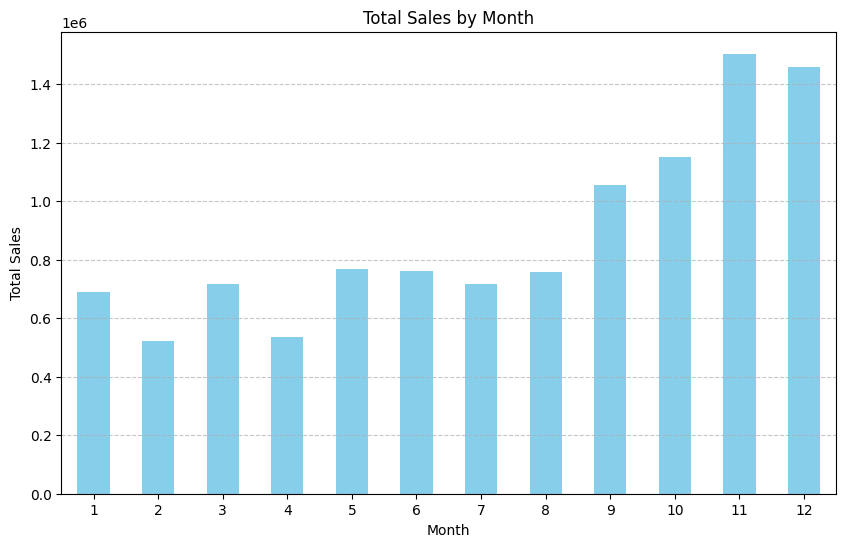

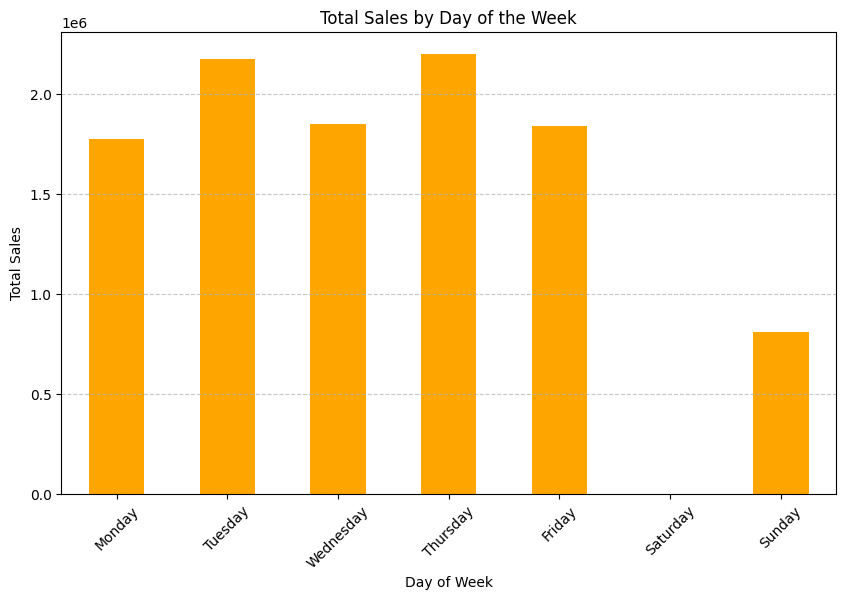

In [24]:
# Aggregate total sales by Month
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

# Aggregate total sales by Day of Week
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()

# Sort Day of Week for proper order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = daily_sales.reindex(day_order)

# Plot total sales by Month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot total sales by Day of Week
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:
# Identify peak month
peak_month = monthly_sales.idxmax()
peak_month_sales = monthly_sales.max()

# Identify peak day of the week
peak_day = daily_sales.idxmax()
peak_day_sales = daily_sales.max()

print(f"Peak Month: {peak_month} with total sales of {peak_month_sales:.2f}")
print(f"Peak Day of the Week: {peak_day} with total sales of {peak_day_sales:.2f}")


Peak Month: 11 with total sales of 1503866.78
Peak Day of the Week: Thursday with total sales of 2199292.57


## Customer Spending:

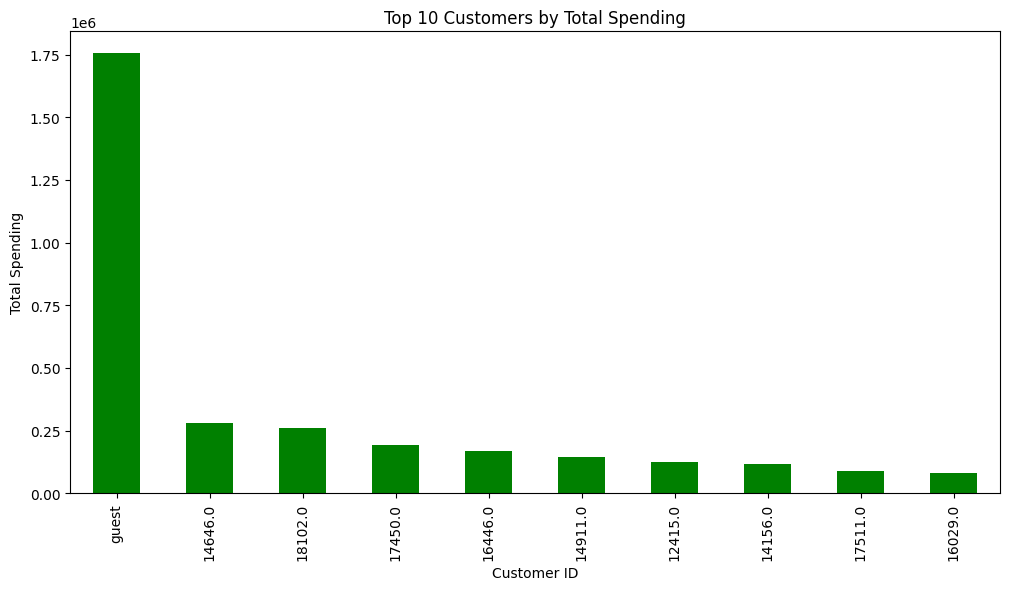

In [26]:
# Top 10 customers by spending
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar', color='green')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()


## Average Transaction Value:

Average Transaction Value: 20.28


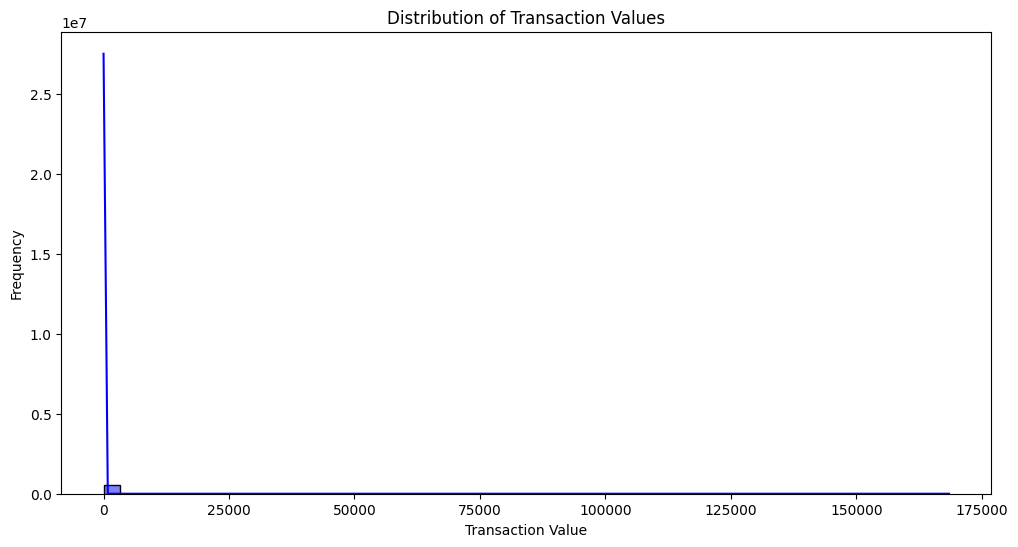

In [29]:
# Average transaction value
avg_transaction_value = df['TotalPrice'].mean()
print(f'Average Transaction Value: {avg_transaction_value:.2f}')

plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPrice'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Identify extremely high or low values (outliers)
# Define a threshold for outliers (e.g., values beyond 3 standard deviations)
threshold = 3
mean_value = df['TotalPrice'].mean()
std_dev = df['TotalPrice'].std()

# Outlier boundaries
lower_bound = mean_value - threshold * std_dev
upper_bound = mean_value + threshold * std_dev

# Filter for outliers
outliers = df[(df['TotalPrice'] < lower_bound) | (df['TotalPrice'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")
print(f"Outlier transaction values:\n{outliers[['InvoiceNo', 'TotalPrice']].head()}")

Number of outliers: 530
Outlier transaction values:
     InvoiceNo  TotalPrice
870     536477      1627.2
2364    536584      1132.8
4505    536785      1576.8
4850    536809      1003.2
4946    536830      1484.0
